In [1]:
import pandas as pd
import os

In [ ]:
data_path = "/Code/Summary_Data/"
os.listdir(data_path)

['.DS_Store', 'Combined Listing Data [Summary].csv']

In [3]:
data = pd.read_csv(data_path + "Combined Listing Data [Summary].csv")
data.head()

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/729302567.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path + "Combined Listing Data [Summary].csv")


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Scrape File'],
      dtype='object')

In [4]:
data.drop(columns=['Unnamed: 0', 'Scrape File'], inplace=True)
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data["last_review"] = pd.to_datetime(data["last_review"])

In [6]:
data.shape

(1633610, 16)

In [6]:
data.dropna(subset="last_review", inplace=True)
data.shape

(1289840, 16)

In [7]:
data_precovid = data[data["last_review"] < "2020-03-01"]
print(data_precovid.shape)

data_postcovid = data[data["last_review"] >= "2020-03-01"]
data_postcovid.shape

(1139836, 16)


(150004, 16)

# 1. High Occupancy Rate: This could be approximated by a lower availability value, indicating more nights are booked.

In [8]:
print(data_postcovid.shape)
data_postcovid.dropna(subset="availability_365", inplace=True)
data_postcovid.shape

(150004, 16)


/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/1022240102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_postcovid.dropna(subset="availability_365", inplace=True)


(150004, 16)

In [14]:
data_postcovid["availability_365"].describe()

count    150004.000000
mean        189.511673
std         130.797339
min           0.000000
25%          74.000000
50%         175.000000
75%         331.000000
max         365.000000
Name: availability_365, dtype: float64

In [ ]:
# using plotly create a boxplot of the data_postcovid availability_365 column. 
import plotly.express as px  
import matplotlib.pyplot as plt
plt.style.use('ggplot')	# to make plots prettier

fig = px.box(data_postcovid, y="availability_365", points="all", hover_data=["availability_365"], title="Availability 365 Boxplot")
fig.show()



/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_1226/4234331279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='availability_365', data=data_postcovid, palette='Set2')


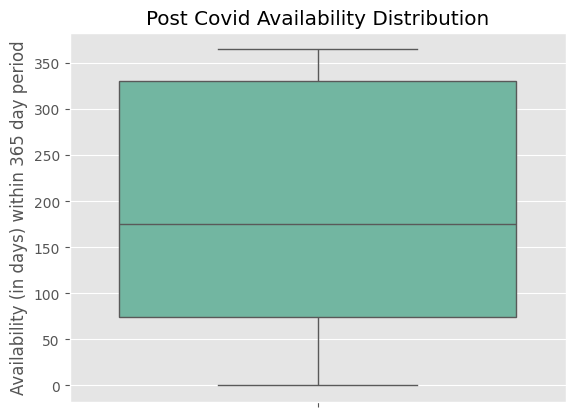

In [11]:
# using plotly create a boxplot of the data_postcovid availability_365 column. 
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')	# to make plots prettier    

sns.boxplot(y='availability_365', data=data_postcovid, palette='Set2')
plt.title('Post Covid Availability Distribution')
plt.ylabel('Availability (in days) within 365 day period')
plt.show()

In [9]:
# Choosing bottom 25th percentile listings i.e. those with availability of less than or equal to 74 days in a year as successful ones
high_occupancy = data_postcovid[data_postcovid["availability_365"] <= 74]
high_occupancy.shape

(37990, 16)

In [26]:
high_occupancy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
high_occupancy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1259090,20585,"Private Studio, 6 Doors to Beach",77857,Barbara,City of Los Angeles,Venice,33.98065,-118.46519,Entire home/apt,124,2,478,2020-03-11,3.94,1,50.0
1259091,20786,Mondrian-Inspired Studio With Breathtaking Vie...,55411,HankBubbie,City of Los Angeles,Hollywood Hills,34.11939,-118.32044,Entire home/apt,215,5,29,2020-03-10,0.30,5,3.0
1259094,22355,"Experience Angeleno Magazine's ""Best Rental In...",55411,HankBubbie,City of Los Angeles,Hollywood Hills,34.11821,-118.32178,Entire home/apt,165,4,41,2020-03-03,0.35,5,51.0
1259105,26082,Asian Pacific Suite,11619,Sarah,City of Los Angeles,Woodland Hills,34.16678,-118.64374,Private room,69,2,30,2020-03-12,0.28,6,69.0
1259138,50005,Guest House - Nightly or Weekly,49391,Michelle,City of Los Angeles,Hollywood,34.09596,-118.34985,Entire home/apt,130,2,111,2020-03-03,0.96,1,66.0


In [11]:
# using plotly create a boxplot of the data_postcovid availability_365 column. 
import plotly.express as px  
import matplotlib.pyplot as plt
plt.style.use('ggplot')	# to make plots prettier

fig = px.box(high_occupancy, y="number_of_reviews", points="all", hover_data=["number_of_reviews"], title="Number Of Reviews for High Occupancy Listings Boxplot")
fig.show()



In [12]:
# q1 for boxplot above is 9 so using that
high_occupancy_with_high_review_count = high_occupancy[high_occupancy["number_of_reviews"] >= 9]
high_occupancy_with_high_review_count

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1259090,20585,"Private Studio, 6 Doors to Beach",77857,Barbara,City of Los Angeles,Venice,33.98065,-118.46519,Entire home/apt,124,2,478,2020-03-11,3.94,1,50.0
1259091,20786,Mondrian-Inspired Studio With Breathtaking Vie...,55411,HankBubbie,City of Los Angeles,Hollywood Hills,34.11939,-118.32044,Entire home/apt,215,5,29,2020-03-10,0.30,5,3.0
1259094,22355,"Experience Angeleno Magazine's ""Best Rental In...",55411,HankBubbie,City of Los Angeles,Hollywood Hills,34.11821,-118.32178,Entire home/apt,165,4,41,2020-03-03,0.35,5,51.0
1259105,26082,Asian Pacific Suite,11619,Sarah,City of Los Angeles,Woodland Hills,34.16678,-118.64374,Private room,69,2,30,2020-03-12,0.28,6,69.0
1259138,50005,Guest House - Nightly or Weekly,49391,Michelle,City of Los Angeles,Hollywood,34.09596,-118.34985,Entire home/apt,130,2,111,2020-03-03,0.96,1,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631454,46297109,Hokikokaka’s Cozy 3-Bedroom Suite near Target ...,374787823,Kieu,Other Cities,Rosemead,34.07363,-118.06873,Entire home/apt,200,1,14,2021-01-02,8.75,1,0.0
1631601,46380127,Total Look Cozy Studio,314322618,Niko,Other Cities,Carson,33.84009,-118.21648,Entire home/apt,57,1,11,2020-12-29,7.17,1,51.0
1631606,46381864,Hollywood Hills Suite 360 Panoramic View/ G-Wagon,217082056,Ash,City of Los Angeles,Hollywood Hills,34.10713,-118.34254,Entire home/apt,208,2,10,2020-12-30,6.52,6,71.0
1631847,46487108,MacStay I Hotel Room on Sunset I 1 King Bed,368015936,Mac Stay,City of Los Angeles,Hollywood,34.09813,-118.34281,Entire home/apt,74,1,9,2020-12-29,5.63,22,0.0


In [13]:
high_occupancy_with_high_review_count.shape

(28745, 16)

In [15]:
# q2 for boxplot above is 31 so using that
high_occupancy_with_high_review_count_median = high_occupancy[high_occupancy["number_of_reviews"] >= 31]
high_occupancy_with_high_review_count_median

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1259090,20585,"Private Studio, 6 Doors to Beach",77857,Barbara,City of Los Angeles,Venice,33.98065,-118.46519,Entire home/apt,124,2,478,2020-03-11,3.94,1,50.0
1259094,22355,"Experience Angeleno Magazine's ""Best Rental In...",55411,HankBubbie,City of Los Angeles,Hollywood Hills,34.11821,-118.32178,Entire home/apt,165,4,41,2020-03-03,0.35,5,51.0
1259138,50005,Guest House - Nightly or Weekly,49391,Michelle,City of Los Angeles,Hollywood,34.09596,-118.34985,Entire home/apt,130,2,111,2020-03-03,0.96,1,66.0
1259256,195823,Lovely Room Near Downtown & USC,952446,James,City of Los Angeles,Jefferson Park,34.03469,-118.31595,Private room,70,4,58,2020-03-04,0.61,2,47.0
1259279,226517,Picturesque port town awaits you !,1180987,Osiris,City of Los Angeles,San Pedro,33.74232,-118.30168,Private room,50,31,157,2020-03-03,1.59,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628278,44165318,Ocean Front Escape - The Junior Suite #2,343003932,James,Other Cities,Santa Monica,34.00948,-118.49392,Private room,155,1,44,2020-12-19,7.50,16,56.0
1628726,44579642,Hillside Modern Guesthouse,313814681,Kiana,Other Cities,Inglewood,33.97903,-118.34650,Entire home/apt,165,2,41,2021-01-01,8.66,3,34.0
1628807,44650430,Sunset One,342147925,Lixa,Other Cities,Malibu,34.01164,-118.81326,Entire home/apt,196,1,42,2020-12-17,8.81,1,3.0
1628885,44757073,2-Level Loft,9251270,Boris,City of Los Angeles,Downtown,34.04509,-118.25277,Entire home/apt,169,30,49,2020-12-20,10.50,16,0.0


In [16]:
high_occupancy_with_high_review_count_median.shape

(19143, 16)

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_88378/1838920718.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



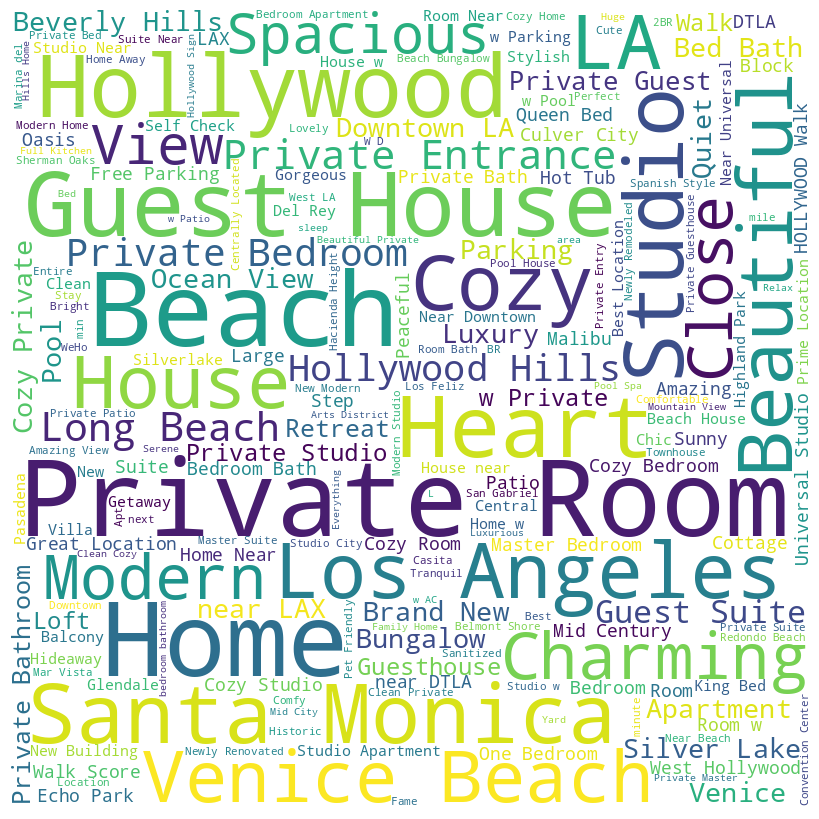

In [29]:
# create a word cloud of the high_occupancy listings using high_occupancy["name"] column
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
high_occupancy["name"] = high_occupancy["name"].astype(str)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(high_occupancy["name"]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()    



/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2904052974.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



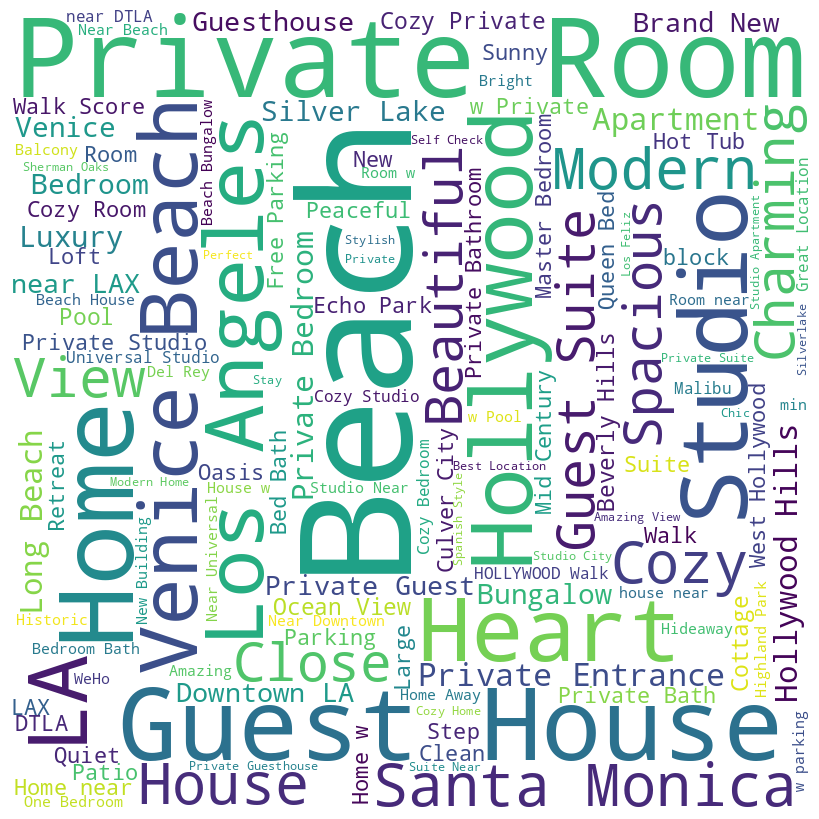

In [14]:
# create a word cloud of the high_occupancy_with_high_review_count listings using high_occupancy_with_high_review_count["name"] column
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
high_occupancy_with_high_review_count["name"] = high_occupancy_with_high_review_count["name"].astype(str)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(high_occupancy_with_high_review_count["name"]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()    

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/3875880508.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



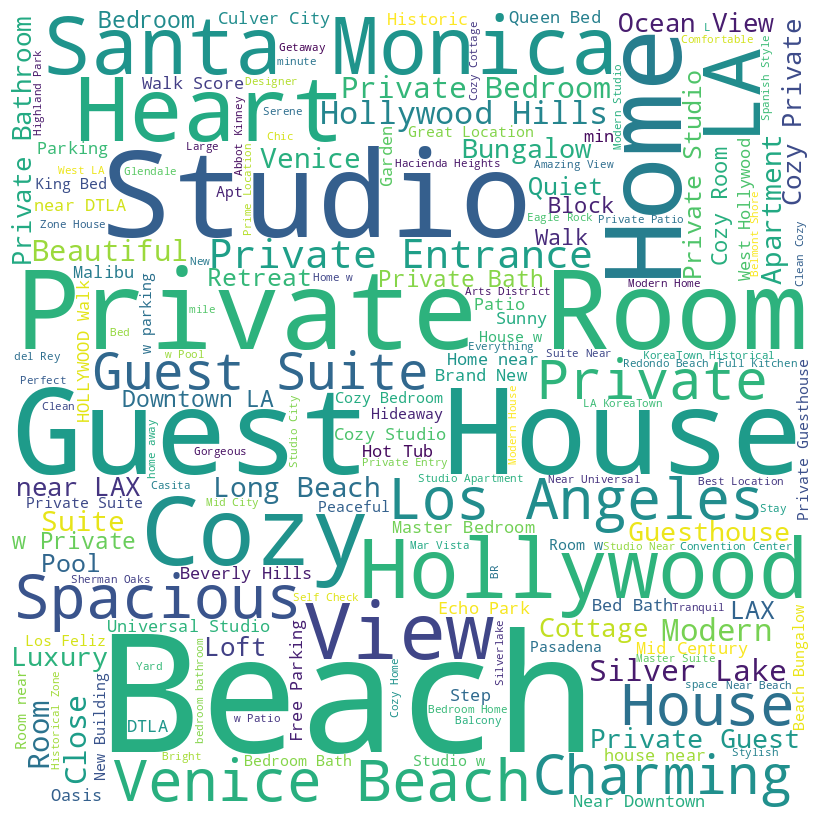

In [17]:
high_occupancy_with_high_review_count_median["name"] = high_occupancy_with_high_review_count_median["name"].astype(str)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(high_occupancy_with_high_review_count_median["name"]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()   

In [18]:
# create a dataframe that does not have rows present in high_occupancy_with_high_review_count_median
unsuccessful_listings = data_postcovid[~data_postcovid["id"].isin(high_occupancy_with_high_review_count_median["id"])]
unsuccessful_listings.shape

(104065, 16)

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




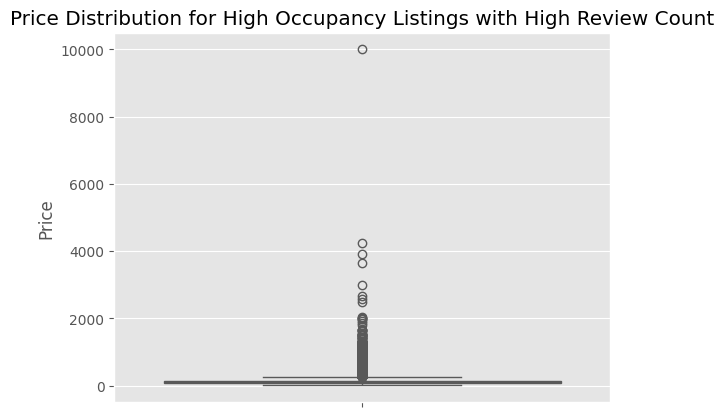

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




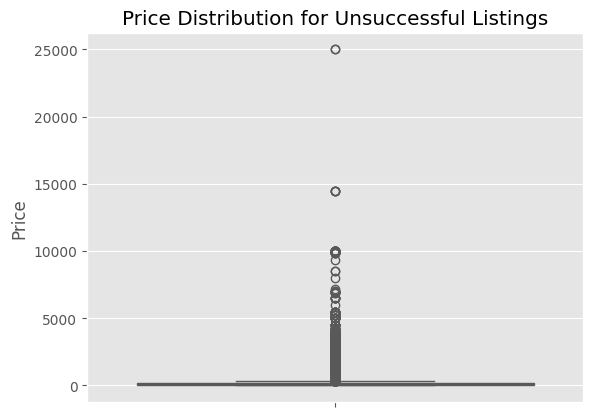

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




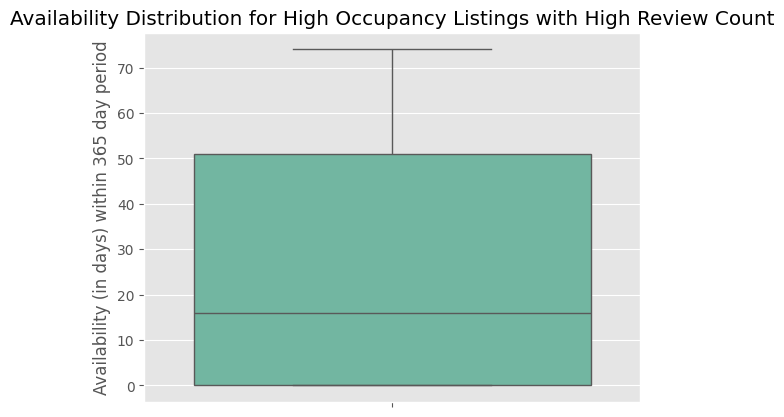

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




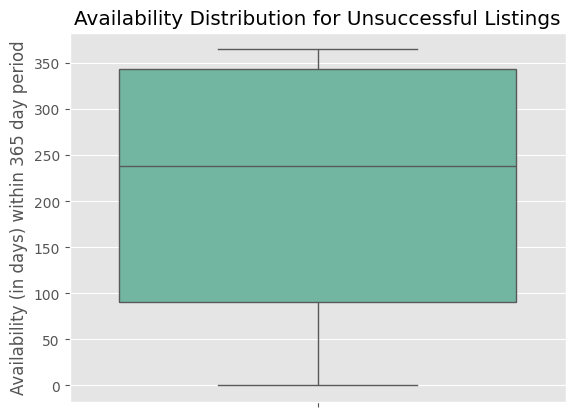

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




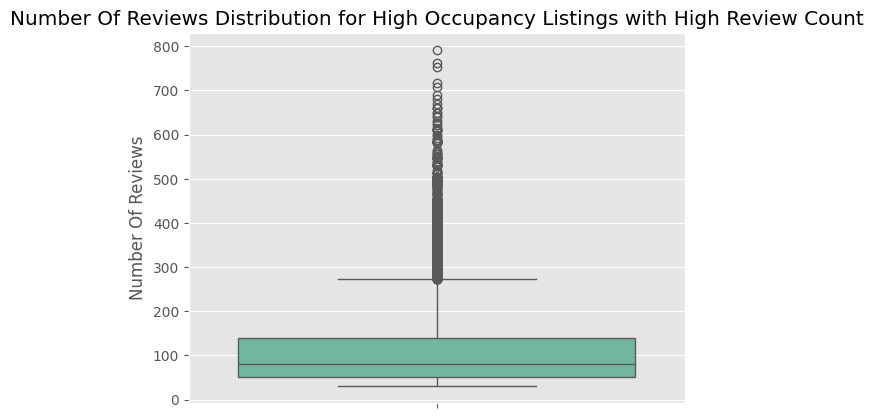

/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_29822/2427942734.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




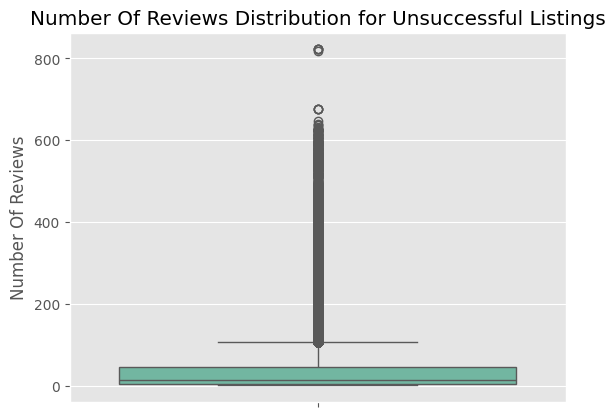

In [19]:
# Compare the distributions of price, availability_365, and number_of_reviews for high_occupancy_with_high_review_count_median and unsuccessful_listings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')	# to make plots prettier    

sns.boxplot(y='price', data=high_occupancy_with_high_review_count_median, palette='Set2')
plt.title('Price Distribution for High Occupancy Listings with High Review Count')
plt.ylabel('Price')
plt.show()

sns.boxplot(y='price', data=unsuccessful_listings, palette='Set2')
plt.title('Price Distribution for Unsuccessful Listings')
plt.ylabel('Price')
plt.show()          

sns.boxplot(y='availability_365', data=high_occupancy_with_high_review_count_median, palette='Set2')
plt.title('Availability Distribution for High Occupancy Listings with High Review Count')
plt.ylabel('Availability (in days) within 365 day period')
plt.show()

sns.boxplot(y='availability_365', data=unsuccessful_listings, palette='Set2')
plt.title('Availability Distribution for Unsuccessful Listings')
plt.ylabel('Availability (in days) within 365 day period')
plt.show()

sns.boxplot(y='number_of_reviews', data=high_occupancy_with_high_review_count_median, palette='Set2')
plt.title('Number Of Reviews Distribution for High Occupancy Listings with High Review Count')
plt.ylabel('Number Of Reviews')
plt.show()

sns.boxplot(y='number_of_reviews', data=unsuccessful_listings, palette='Set2')
plt.title('Number Of Reviews Distribution for Unsuccessful Listings')
plt.ylabel('Number Of Reviews')
plt.show()

